In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

2023-10-31 22:27:33.185139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = pd.read_csv("datasets/iris/iris_extended.csv")
dataset.tail()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
1195,virginica,268.8,loamy,5.36,2.51,5.16,1.93,13.4536,9.9588,2.135458,...,1.038760,1.300518,0.20,0.58,11.61,11.52,59.46,3.667915,3.155757,1.350926
1196,virginica,125.4,clay,7.49,3.06,7.68,2.17,22.9194,16.6656,2.447712,...,0.975260,1.410138,-0.19,0.89,13.85,6.99,77.12,4.787421,4.082352,1.375252
1197,virginica,73.6,clay,6.79,3.25,4.72,2.26,22.0675,10.6672,2.089231,...,1.438559,1.438053,2.07,0.99,13.13,9.16,74.39,4.697606,3.266068,2.068725
1198,virginica,239.6,sandy,6.38,2.24,5.30,1.71,14.2912,9.0630,2.848214,...,1.203774,1.309942,1.08,0.53,11.01,6.46,73.90,3.780370,3.010482,1.576873
1199,virginica,201.5,loamy,5.16,3.20,5.64,1.43,16.5120,8.0652,1.612500,...,0.914894,2.237762,-0.48,1.77,12.09,8.59,64.31,4.063496,2.839930,2.047314


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

In [4]:
dataset.isna().sum()

species                            0
elevation                          0
soil_type                          0
sepal_length                       0
sepal_width                        0
petal_length                       0
petal_width                        0
sepal_area                         0
petal_area                         0
sepal_aspect_ratio                 0
petal_aspect_ratio                 0
sepal_to_petal_length_ratio        0
sepal_to_petal_width_ratio         0
sepal_petal_length_diff            0
sepal_petal_width_diff             0
petal_curvature_mm                 0
petal_texture_trichomes_per_mm2    0
leaf_area_cm2                      0
sepal_area_sqrt                    0
petal_area_sqrt                    0
area_ratios                        0
dtype: int64

In [5]:
dataset['species'].value_counts()

species
setosa        400
versicolor    400
virginica     400
Name: count, dtype: int64

/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

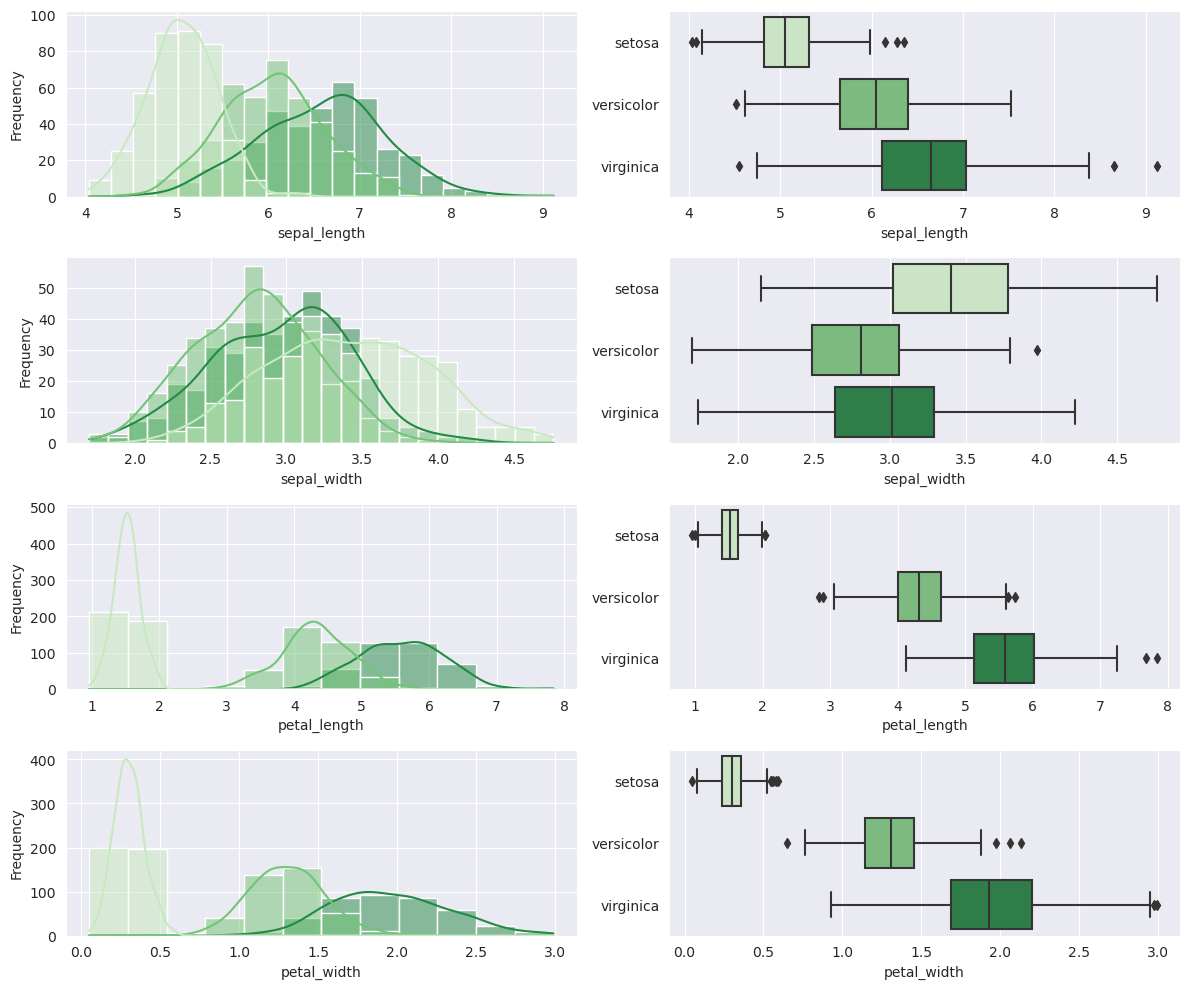

In [9]:
num_cols = ['sepal_length','sepal_width','petal_length', 'petal_width']

# Create subplots: 4 rows and 2 columns (1 for histogram, 1 for boxplot)
f, ax = plt.subplots(4, 2, figsize=(12, 10))

for i, col in enumerate(num_cols):
    # Plot histogram on the first column of the subplot
    sns.histplot(data=dataset, x=col, kde=True, ax=ax[i, 0], hue='species', edgecolor='white', palette="Greens", legend=False)
    ax[i, 0].set_ylabel('Frequency')
    ax[i, 0].set_xlabel(col)
    
    # Plot boxplot on the second column of the subplot
    sns.boxplot(data=dataset, x=col, y='species', ax=ax[i, 1], palette="Greens")
    ax[i, 1].set_ylabel('')  # No y-label for clarity, as it's repeated from histogram

plt.tight_layout()
plt.show()

/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

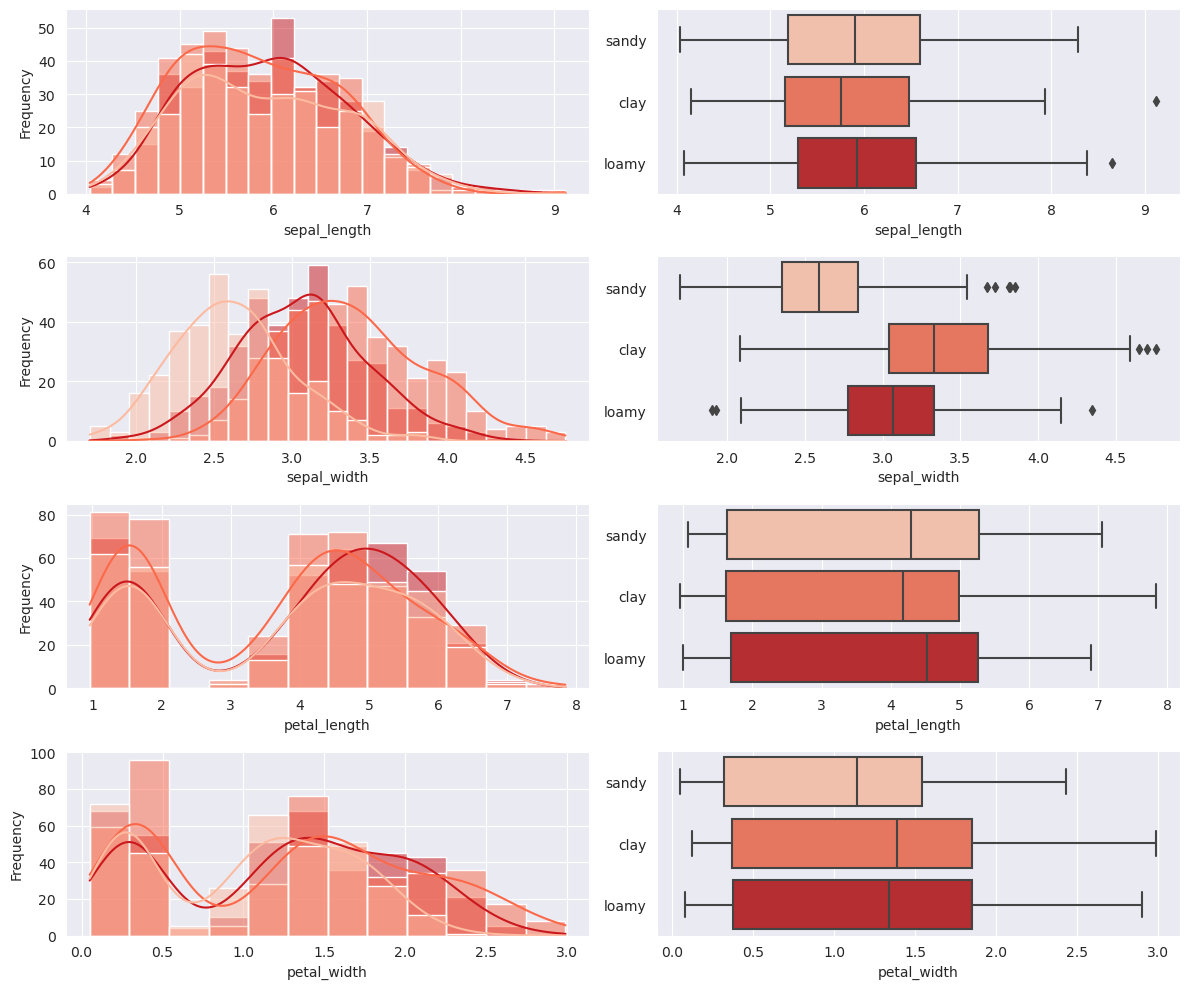

In [14]:
num_cols = ['sepal_length','sepal_width','petal_length', 'petal_width']

# Create subplots: 4 rows and 2 columns (1 for histogram, 1 for boxplot)
f, ax = plt.subplots(4, 2, figsize=(12, 10))

for i, col in enumerate(num_cols):
    # Plot histogram on the first column of the subplot
    sns.histplot(data=dataset, x=col, kde=True, ax=ax[i, 0], hue='soil_type', edgecolor='white', palette="Reds", legend=False)
    ax[i, 0].set_ylabel('Frequency')
    ax[i, 0].set_xlabel(col)
    
    # Plot boxplot on the second column of the subplot
    sns.boxplot(data=dataset, x=col, y='soil_type', ax=ax[i, 1], palette="Reds")
    ax[i, 1].set_ylabel('')  # No y-label for clarity, as it's repeated from histogram

plt.tight_layout()
plt.show()

/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/remunata/miniconda3/envs/dsml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

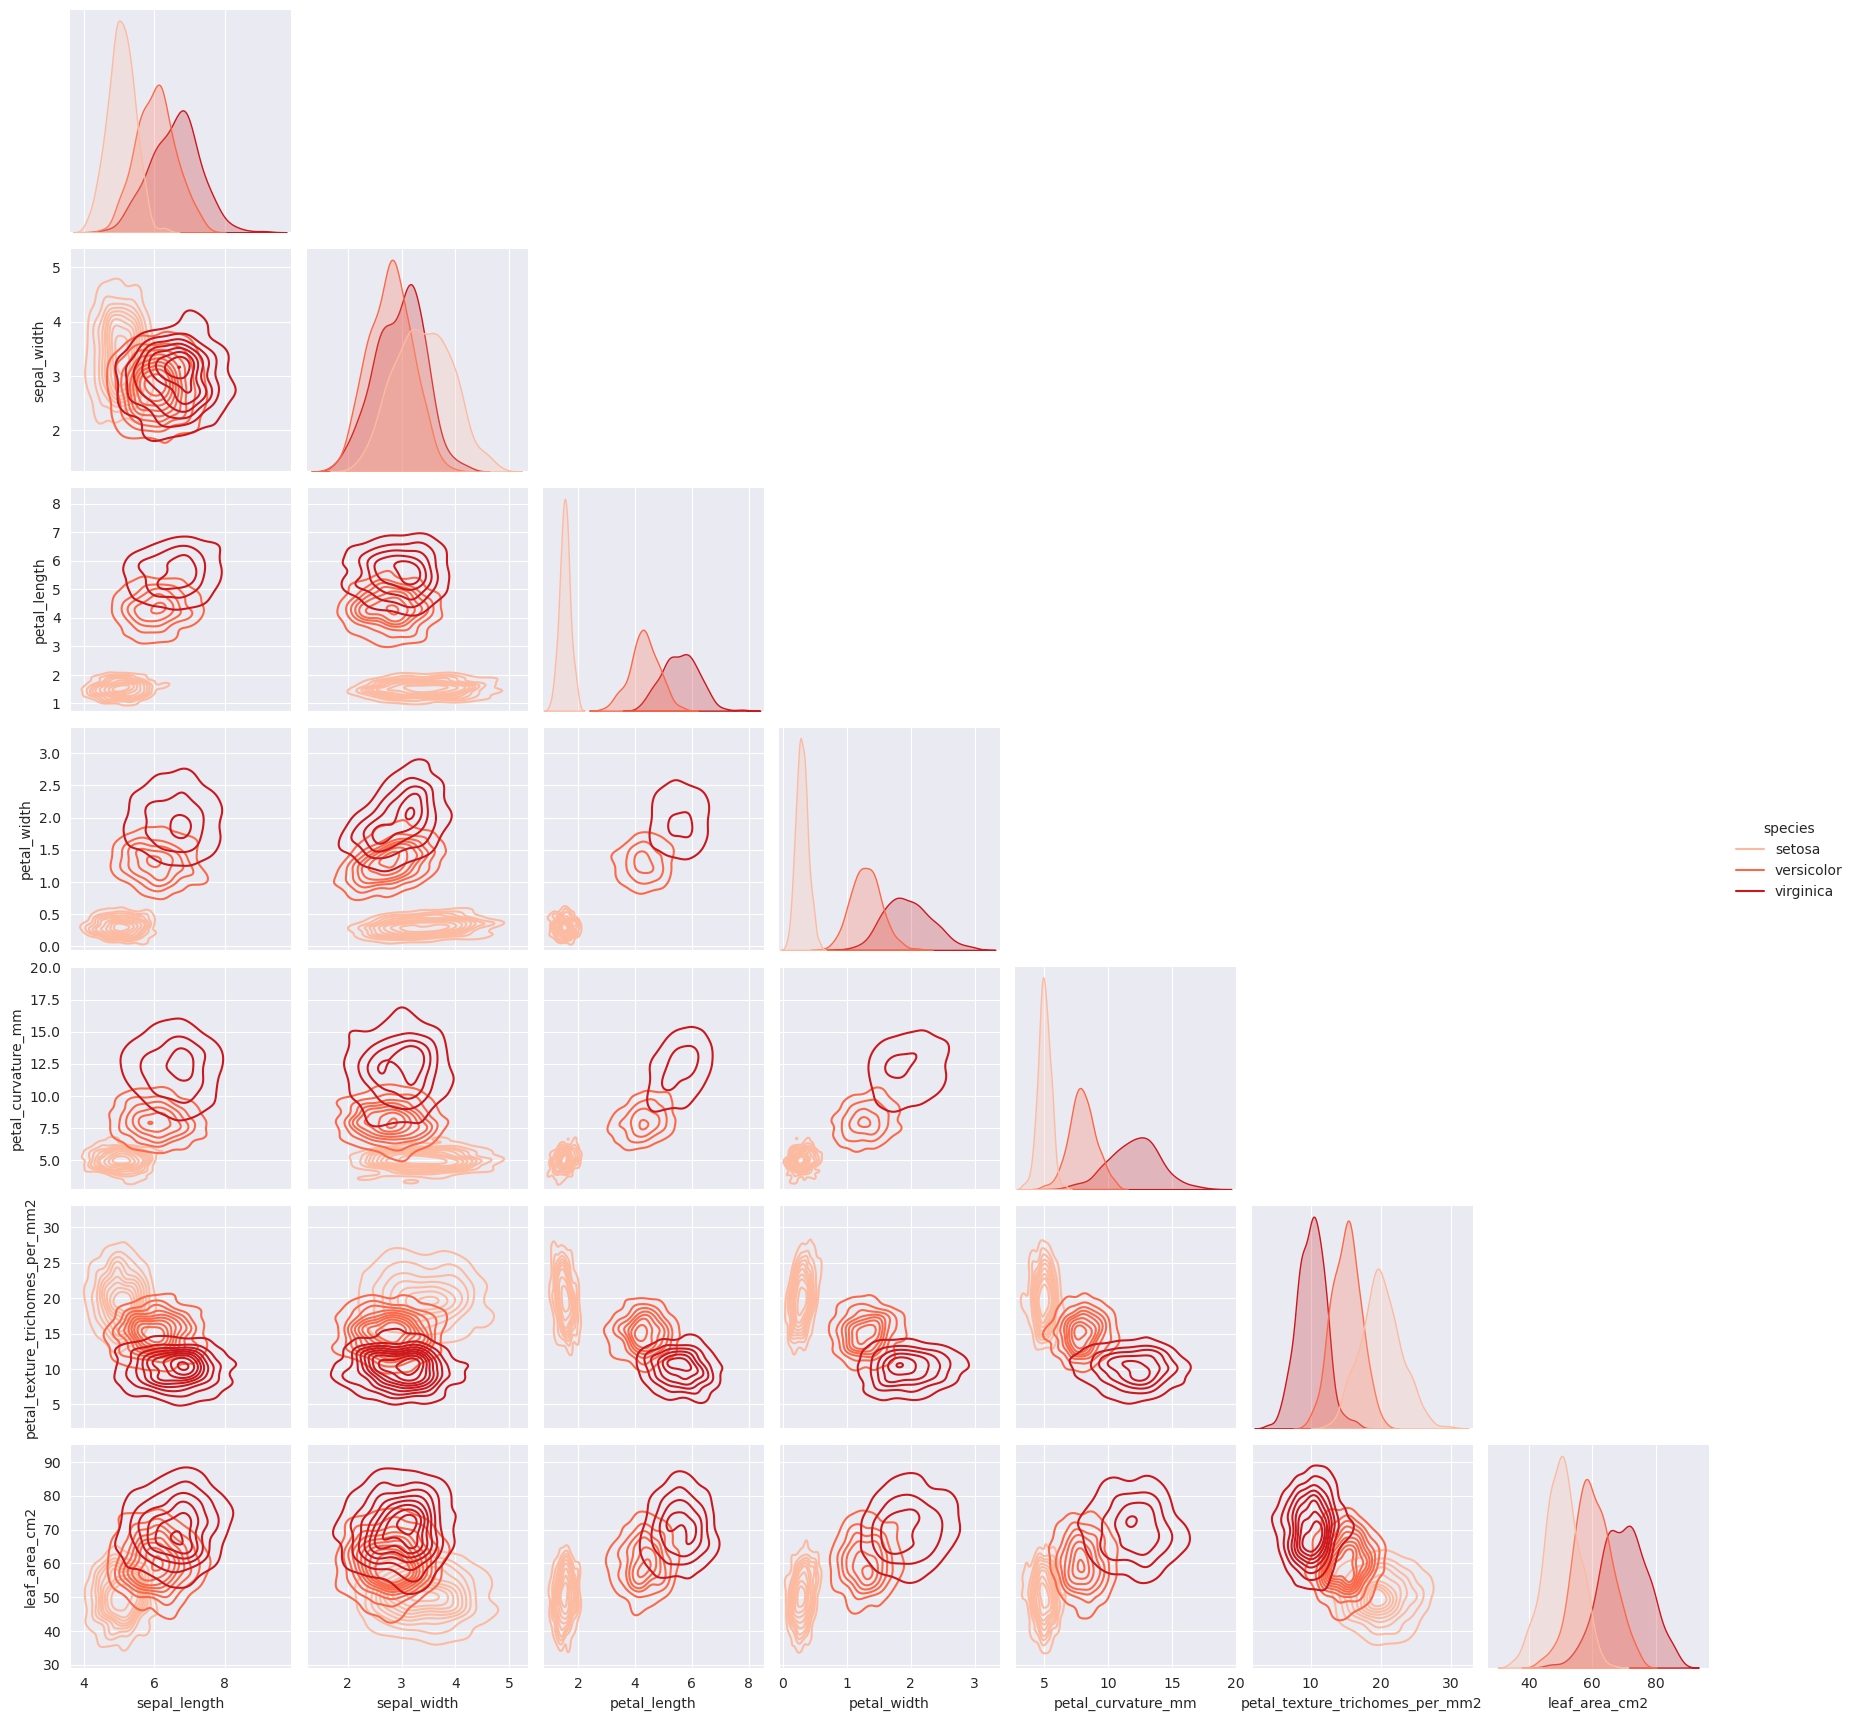

In [15]:
selected_columns = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 
                       'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'species']]

# Create the pairplot with regplots
sns.pairplot(selected_columns, hue='species', palette="Reds", corner=True, kind='kde')

plt.show()